In [27]:
# Importing Dependencies.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
##########################
import pandas as pd
import numpy as np
#########################
from scipy import stats
#########################
import cufflinks as cf
cf.go_offline()
#########################
import datetime as dt
from datetime import timedelta
##########################
import matplotlib.pyplot as plt
import pyfolio as pf
import empyrical as ep

In [28]:
from tvDatafeed import TvDatafeed, Interval
##########################################
username = ''
password = ''
##########################################
tv = TvDatafeed(username, password)
# NIFTY INDEX.
Nifty_index_data = tv.get_hist(symbol='NIFTY1!',
                                    exchange='NSE',
                                    interval=Interval.in_3_minute,
                                    n_bars=30000)
Nifty_index_data = df = Nifty_index_data[['symbol','open','high','low','close','volume']]
df = df.drop(columns=['volume','symbol'],axis=1)
#Resample the intervals further
#df = df.resample('12 T 30 s').first()
# Set Market time 
df = df.between_time('9:00', '14:45')
df = df.dropna(inplace=False)

ERROR:tvDatafeed.main:error while signin


In [29]:
# Between Dates intervals 
from datetime import datetime
######################
def filter_date_range(df, start_date, end_date):
    start_dt = datetime.strptime(start_date, '%Y-%m-%d')
    end_dt = datetime.strptime(end_date, '%Y-%m-%d')
    return df[(df.index >= start_dt) & (df.index <= end_dt)]
######################
start_date = '2023-06-22'
end_date = '2023-06-23'
#######################
df = filter_date_range(df, start_date, end_date)
#######################

In [30]:
# Calculate the returns
df['pct_returns'] = df['close'].pct_change()
#df['strategy_returns'] = df['pct_returns'] * df['signal'].shift()

In [31]:
stability_scores = []
for index, row in df.iterrows():
    returns = df.loc[:index, 'pct_returns'].dropna()
    stability = ep.stability_of_timeseries(returns)
    stability = round(stability,2)
    stability_scores.append(stability)
df['stability'] = stability_scores

In [32]:
df['signal'] = np.where(((df['stability'] >= 0.27)), 1,
                       np.where((df['stability'] <= 0.99), -1, 0))

In [33]:
df['signal'] = df['signal'].replace(to_replace=0,method='ffill')

In [34]:
df['strategy_returns'] = df['pct_returns'] * df['signal'].shift()

In [35]:
df.tail(60)

,open,high,low,close,pct_returns,stability,signal,strategy_returns
datetime,,,,,,,,
2023-06-22 11:48:00,18868.00,18872.35,18865.35,18865.35,-0.000140,0.31,1,-0.000140
2023-06-22 11:51:00,18865.35,18867.45,18861.00,18861.70,-0.000193,0.34,1,-0.000193
2023-06-22 11:54:00,18864.00,18874.55,18855.25,18869.80,0.000429,0.36,1,0.000429
2023-06-22 11:57:00,18871.75,18871.75,18864.05,18866.40,-0.000180,0.38,1,-0.000180
2023-06-22 12:00:00,18867.00,18869.90,18863.60,18865.40,-0.000053,0.40,1,-0.000053
2023-06-22 12:03:00,18866.30,18868.60,18850.35,18850.90,-0.000769,0.43,1,-0.000769
2023-06-22 12:06:00,18850.20,18855.75,18850.00,18850.50,-0.000021,0.46,1,-0.000021
2023-06-22 12:09:00,18851.20,18852.00,18840.80,18845.00,-0.000292,0.48,1,-0.000292
2023-06-22 12:12:00,18845.00,18845.00,18840.00,18843.00,-0.000106,0.51,1,-0.000106


Start: 
2023-06-22 09:15:00 
End: 
2023-06-22 14:45:00
------------------------
Sortino Ratio: 3.97
Calmar Ratio: 2.93
Omega Ratio: 1.45
Tail Ratio: 1.48
------------------------------
The Annualised Sharpe Ratio is 2.23
Gains in Points: 111.25
------------------------------
Total Signal Counts:
signal
 1    64
-1    45
 0     2
------------------------
Strategy Return: 0.59 %
The Max Drawdown: -0.46 %
Stability of Time Series : 0.12


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,0.46,2023-06-22,2023-06-22,2023-06-22,1
1,0.08,2023-06-22,2023-06-22,2023-06-22,1
2,0.07,2023-06-22,2023-06-22,2023-06-22,1
3,0.07,2023-06-22,2023-06-22,2023-06-22,1
4,0.01,2023-06-22,2023-06-22,2023-06-22,1


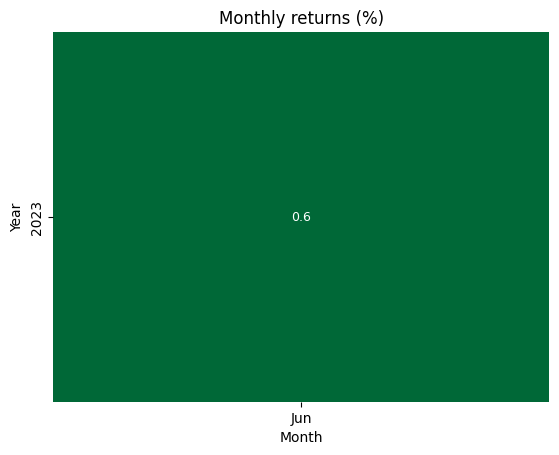

In [36]:
def metrics():
# Importing Required Dependencies.
    import numpy as np
    import pandas as pd
    import empyrical as ep
    import pyfolio as pf


# This code calculate the gains in points based on a signal column 
    j = df.signal  # forward-fill missing values in df.position
    e = df.close

    result = []
    for i in range(len(j)):
        if i == len(j)-1 or pd.isna(j[i]) or pd.isna(j[i+1]):
            result.append(0)  # if there's a missing value or last row, append 0
        elif j[i] == -1:
            result.append(e[i] - e[i+1])
        elif j[i] == 1:
            result.append(e[i+1] - e[i])
        else:
            result.append(0)

    total = sum(result)

# Calculate the annualised Sharpe ratio
    sharpe = np.sqrt(252) * \
    df.strategy_returns.mean() / df.strategy_returns.std()
# Calculating Max Drawdown.
    max_dd= ep.max_drawdown(df.strategy_returns)
# Calculating Stablity of Time Series of Returns.
    stablity = ep.stability_of_timeseries(df.strategy_returns)
# Calculating Sortino Ratio
    Sortino = ep.sortino_ratio(df.strategy_returns)
# Calculating Calmar ratio
    calmar_ratio = ep.calmar_ratio(df.strategy_returns)
# Calculating Omega ratio
    omega_ratio = ep.omega_ratio(df.strategy_returns, risk_free=0)
# Print start and end date of returns series
    print(f'Start: \n{df.index[0]} \nEnd: \n{df.index[-1]}')
    print('------------------------')
# Print various performance metrics
    print(f'Sortino Ratio: {(Sortino):.2f}') 
    print(f'Calmar Ratio: {calmar_ratio:.2f}')
    print(f'Omega Ratio: {omega_ratio:.2f}')
    print('Tail Ratio:',ep.tail_ratio(df['strategy_returns']).round(2))
    print('------------------------------')
    print("The Annualised Sharpe Ratio is %.2f" % sharpe)
    print(f'Gains in Points: {total:.2f}')
    print('------------------------------')
    print(f'Total Signal Counts:\n{df.signal.value_counts().to_string()}')
    print('------------------------')
    print(f'Strategy Return: {((df.strategy_returns.cumsum()[-1]*100)) :.2f} %') 
    print(f'The Max Drawdown: {(max_dd*100):.2f} %') #times 100
    print(f'Stability of Time Series : {stablity:.2f}')
# Plot worst drawdown periods and monthly returns heatmap
    pf.show_worst_drawdown_periods(df['strategy_returns'])
    pf.plot_monthly_returns_heatmap(df['strategy_returns'])
metrics()

In [37]:
# This code calculate the gains in points based on a signal column 
j = df.signal  # forward-fill missing values in df.position
e = df.close

result = []
for i in range(len(j)):
    if i == len(j)-1 or pd.isna(j[i]) or pd.isna(j[i+1]):
        result.append(0)  # if there's a missing value or last row, append 0
    elif j[i] == -1:
        result.append(e[i] - e[i+1])
    elif j[i] == 1:
        result.append(e[i+1] - e[i])
    else:
        result.append(0)

total = sum(result)
print(f'Gains in Points: {total:.2f}')

Gains in Points: 111.25


In [38]:
# New Dataframe df1 for TradeSheet.
previous_signal = 0
change_points = []

# Iterate over the dataframe
for index, row in df.iterrows():
    current_signal = row['signal']
    
    if previous_signal is None:
        # First iteration, set previous signal
        previous_signal = current_signal
    elif current_signal != previous_signal:
        # Signal changed, store the row
        change_points.append(row)
        previous_signal = current_signal
        
# Convert the list of rows to a dataframe
df1 = pd.DataFrame(change_points)
df1['EntryTime'] = df1.index
df1['EntryPrice'] = df1['close']
df1['ExitTime'] = df1['EntryTime'].shift(-1)
df1['ExitPrice'] = df1['EntryPrice'].shift(-1)
# Calculate PnL based on the signal
df1['PnL'] = df1.apply(lambda row: row['EntryPrice'] - row['ExitPrice']
                     if row['signal'] == -1
                     else row['ExitPrice'] - row['EntryPrice']
                     if row['signal'] == 1
                     else pd.NaT,
                     axis=1)
# Reset the index
df1.reset_index(inplace=True)
# Drop extra rows
df1 = df1.drop(columns=['index','pct_returns','close','strategy_returns','open','high','low'],axis=1)
# Print the Dataframe
df1
print(f"Total Points: {np.round(df1['PnL'].sum(), 2)}")
print(f'Total {df1.signal.value_counts().to_string()}')
print(f'Stability of Time Series : {ep.stability_of_timeseries(df.strategy_returns):.2f}')

,stability,signal,EntryTime,EntryPrice,ExitTime,ExitPrice,PnL
0,1.00,1.0,2023-06-22 09:21:00,18884.10,2023-06-22 09:42:00,18893.00,8.90
1,0.24,-1.0,2023-06-22 09:42:00,18893.00,2023-06-22 10:36:00,18907.00,-14.00
2,0.27,1.0,2023-06-22 10:36:00,18907.00,2023-06-22 10:48:00,18891.95,-15.05
3,0.26,-1.0,2023-06-22 10:48:00,18891.95,2023-06-22 11:45:00,18868.00,23.95
4,0.28,1.0,2023-06-22 11:45:00,18868.00,2023-06-22 14:06:00,18887.70,19.70
5,0.26,-1.0,2023-06-22 14:06:00,18887.70,2023-06-22 14:30:00,18826.50,61.20
6,0.27,1.0,2023-06-22 14:30:00,18826.50,NaT,NaN,NaN


Total Points: 84.7
Total signal
 1.0    4
-1.0    3
Stability of Time Series : 0.12


df['signal'] = df['signal'].where(df['signal'].diff().fillna(0).ne(0), np.nan)
df['signal'].value_counts()

pf.create_full_tear_sheet(df['strategy_returns'])

In [39]:
df[['stability','close']].iplot(secondary_y='stability')